# Chapter 4 - Inferences with Gaussians
## 4.1 Inferring a mean and standard deviation


Inferring the mean and variance of a Gaussian distribution. 
$$ \mu \sim \text{Gaussian}(0, .001)  $$
$$ \sigma \sim \text{Uniform} (0, 10)  $$
$$ x_{i} \sim \text{Gaussian} (\mu, \frac{1}{\sigma^2})  $$


 [-----------------100%-----------------] 20000 of 20000 complete in 1.4 secPlotting sigma
Plotting mu


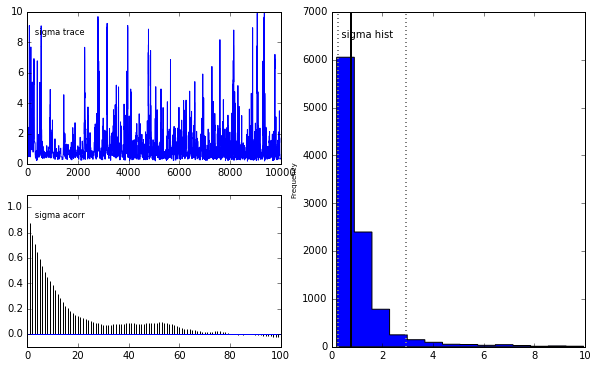

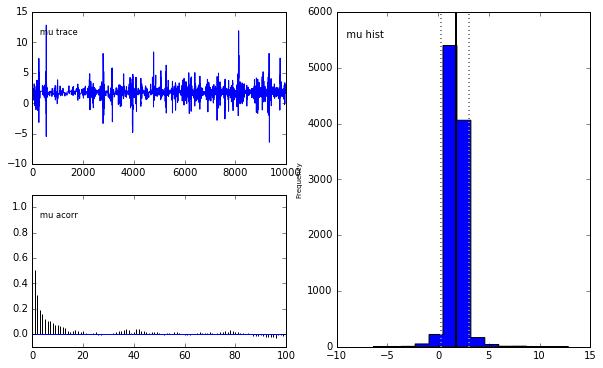

In [1]:
# pymc2
import pymc as pymc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc.graph
%matplotlib inline

x = np.array([1.1, 1.9, 2.3, 1.8])
n = len(x)

# prior
mu = pymc.Normal("mu",mu=0,tau=.001)
sigma = pymc.Uniform("sigma",lower=0, upper=10)

xi = pymc.Normal("xi",mu = mu, tau = 1/(sigma**2),value = x,observed=True)

testmodel = pymc.Model([mu, sigma, xi])
mcmc = pymc.MCMC(testmodel)
mcmc.sample(iter = 20000, burn = 50, thin = 2)

pymc.Matplot.plot(mcmc)

 [-----------------100%-----------------] 2000 of 2000 complete in 2.9 sec

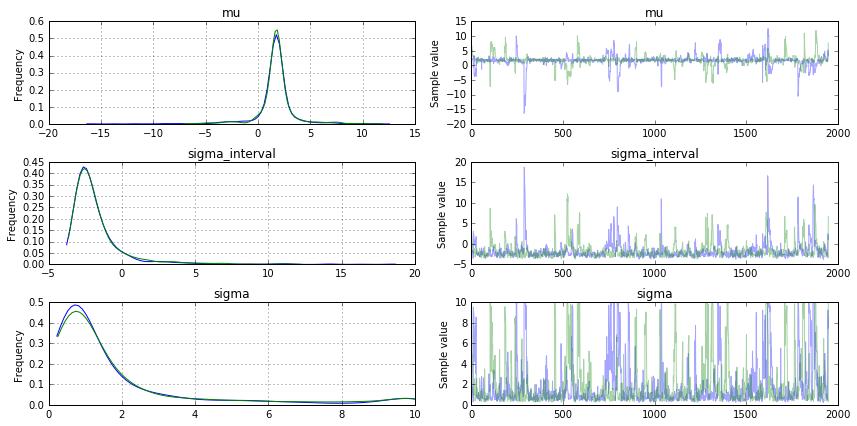

In [4]:
# pymc3
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

with pm.Model() as testmodel:
    x = np.array([1.1, 1.9, 2.3, 1.8])
    n = len(x)

    # prior
    mu = pm.Normal("mu",mu=0,tau=.001)
    sigma = pm.Uniform("sigma",lower=0, upper=10)

    xi = pm.Normal("xi",mu = mu, tau = 1/(sigma**2),observed=x)
    
    # Inference button
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, njobs=2)

pm.traceplot(trace[50:]);

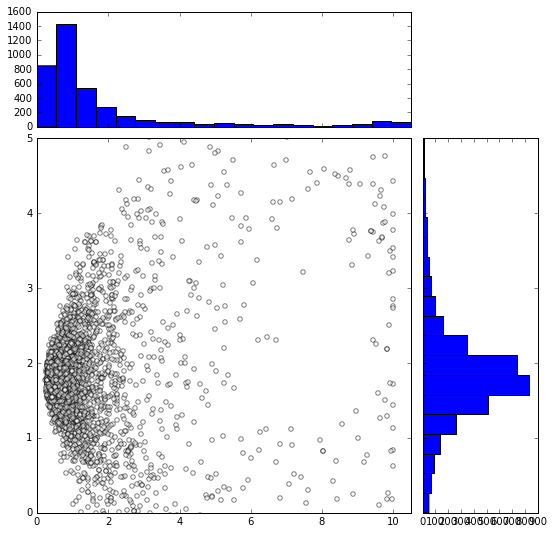

The mu estimation is:  1.68257189181
The sigma estimation is:  1.88720618062


In [5]:
from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels
# pymc2
# y = mcmc.trace("mu")[51:]
# x = mcmc.trace("sigma")[51:]
# pymc3
y = trace['mu'][50:]
x = trace['sigma'][50:]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y,c=[1,1,1],alpha=.5)

# now determine nice limits by hand:
binwidth1 = 0.25
axScatter.set_xlim((-.01, 10.5))
axScatter.set_ylim((-0, 5))

bins1 = np.linspace(-.01, 10.5, 20)
axHistx.hist(x, bins=bins1)
bins2 = np.linspace(-0, 5, 20)
axHisty.hist(y, bins=bins2, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()
print("The mu estimation is: ", y.mean())
print("The sigma estimation is: ", x.mean())


## 4.2 The seven scientists


The model:
$$ \mu \sim \text{Gaussian}(0, .001)  $$
$$ \lambda_{i} \sim \text{Gamma} (.001, .001)  $$
$$ \sigma = 1/{\sqrt\lambda_{i}} $$  
$$ x_{i} \sim \text{Gaussian} (\mu, \lambda_{i})  $$

The mean is the same for all seven scientists, while the standard deviations are different 

 [-----------------100%-----------------] 20000 of 20000 complete in 1.7 secPlotting lambda1_0
Plotting lambda1_1
Plotting lambda1_2
Plotting lambda1_3
Plotting lambda1_4
Plotting lambda1_5
Plotting lambda1_6
Plotting mu
The mu estimation is:  9.53314364075
The sigma estimation is: 
124.01374345035451
747.3068268284875
5.986202915542295
3.071351534056384
2.3879334591128196
1.922458920317897
7.376409186220111


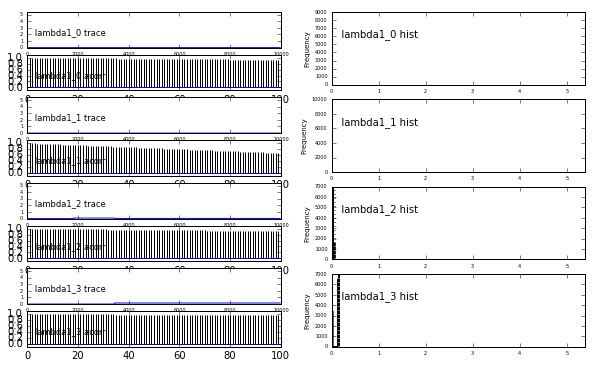

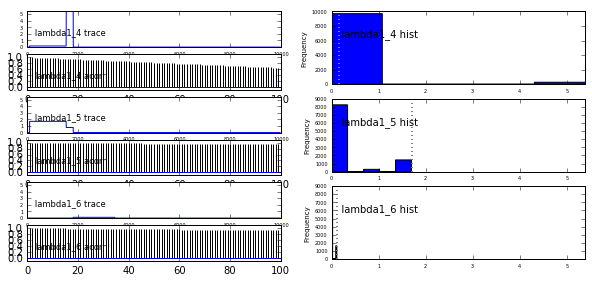

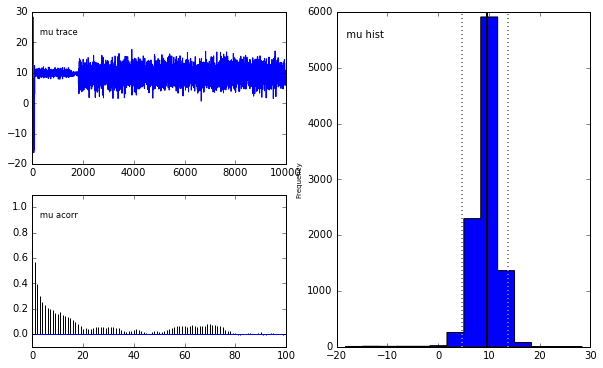

In [9]:
# pymc2
import pymc as pymc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc.graph
%matplotlib inline
from math import *


x = np.array([-27.020,3.570,8.191,9.898,9.603,9.945,10.056])
n = len(x)

# prior
mu = pymc.Normal("mu",mu=0,tau=.001,value=x.mean())
lambda1 = pymc.Gamma("lambda1",alpha=.01,beta=.01,size=(n))

# @pymc.deterministic
# def sigma(lambda1 = lambda1):
#     for ii in lambda1:
#         sigma[ii] = 1 / sqrt(ii)
#     return sigma

xi = pymc.Normal("xi",mu = mu, tau = lambda1,value = x,observed=True)

testmodel = pymc.Model([mu, lambda1, xi])
mcmc = pymc.MCMC(testmodel)

mcmc.use_step_method(pymc.Metropolis, lambda1, proposal_sd=.01, proposal_distribution='Prior')

mcmc.sample(iter = 20000, burn = 50, thin = 2)

pymc.Matplot.plot(mcmc)
mu = mcmc.trace("mu")[51:]
lambda1 = mcmc.trace("lambda1")[51:]

print("The mu estimation is: ", mu.mean())
print("The sigma estimation is: ")
for i in np.mean(np.squeeze(lambda1),axis=0):
    print(1 / sqrt(i))

The mu estimation is:  9.79798363991
The sigma estimation is: 
33.98363014693153
5.688023697378043
1.1619969163368598
0.24794116612592534
0.295536033300598
0.24824864920634435
0.26829698543536046
 [-----------------100%-----------------] 5000 of 5000 complete in 97.2 sec

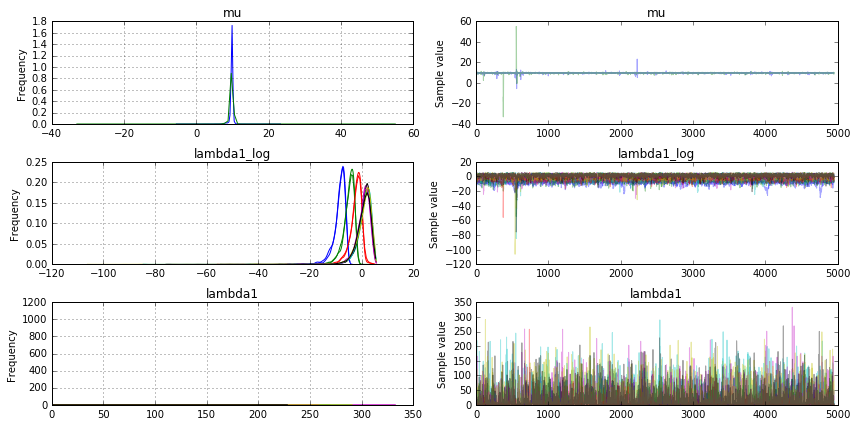

In [10]:
# pymc3 - seems to work much better than pymc2 ()
with pm.Model() as testmodel: 
    x = np.array([-27.020,3.570,8.191,9.898,9.603,9.945,10.056])
    n = len(x)
    
    # prior
    mu = pm.Normal("mu",mu=0,tau=.001)
    lambda1 = pm.Gamma("lambda1",alpha=.01,beta=.01,shape=(n))
    # lambda1 = [pm.Gamma('lambda1_%i'%i, alpha=.01,beta=.01) for i in range(n)]
    
    # sigma = pm.Potential("sigma",1 / sqrt(lambda1))

    xi = pm.Normal("xi",mu = mu, tau = lambda1, observed = x )

    # Inference button
    step = pm.NUTS()
    trace = pm.sample(5000, step=step, njobs=2)

pm.traceplot(trace[50:]);

mu = trace['mu'][50:]
lambda1 = trace['lambda1'][50:]

print("The mu estimation is: ", mu.mean())
print("The sigma estimation is: ")
for i in np.mean(np.squeeze(lambda1),axis=0):
    print(1 / sqrt(i))

## 4.3 Repeated measurement of IQ


The model:
$$ \mu_{i} \sim \text{Uniform}(0, 300)  $$
$$ \sigma \sim \text{Uniform} (0, 100)  $$
$$ x_{ij} \sim \text{Gaussian} (\mu_{i}, \frac{1}{\sigma^2})  $$

Data Come From Gaussians With Different Means But Common Precision

 [-----------------100%-----------------] 20000 of 20000 complete in 3.8 secPlotting mui_3
Plotting sg
Plotting mui_2
Plotting mui_1
The mu estimation is:  94.8303134549   110.075894926   154.997184517
The sigma estimation is:  6.51012959799


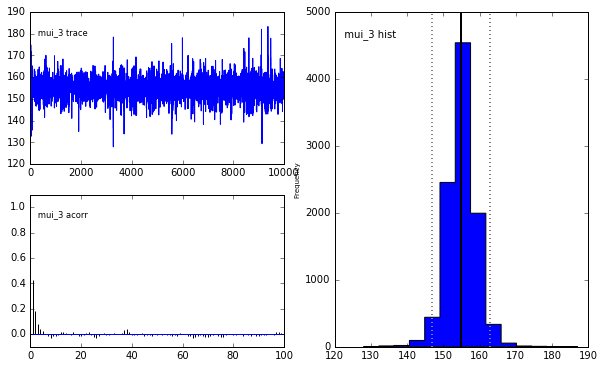

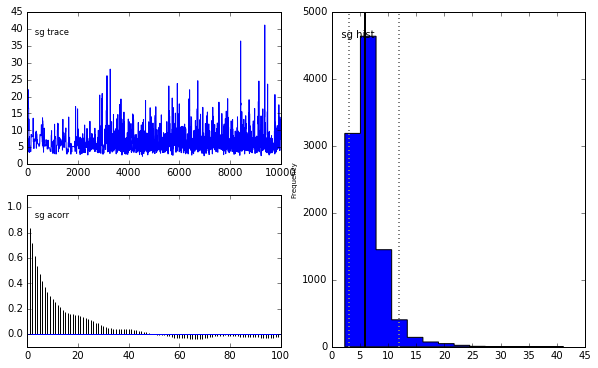

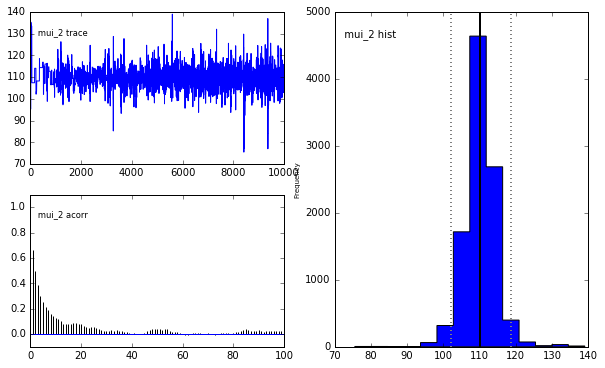

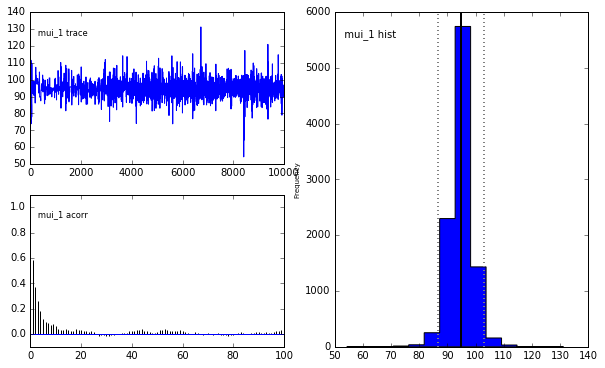

In [18]:
# pymc2
y = np.array([[90,95,100],[105,110,115],[150,155,160]])
idx = np.array([[1,1,1],[2,2,2],[3,3,3]])

ntest = 3
nsbj = 3

# mu_i ~ Uniform(0, 300)
# mui = pymc.Uniform("mui", 0, 300, size=(nsbj,1))

mui_1 = pymc.Uniform('mui_1', 0, 300)
mui_2 = pymc.Uniform('mui_2', 0, 300)
mui_3 = pymc.Uniform('mui_3', 0, 300)
    
# sg ~ Uniform(0, 100)
sg = pymc.Uniform("sg", .0, 100)

@pymc.deterministic
def lambda1(sigma = sg):
    return sigma ** -2

@pymc.deterministic
def mui( ber = idx.ravel(), mean1 = mui_1, mean2 = mui_2, mean3 = mui_3):
    return (ber==1)*mean1 + (ber==2)*mean2 + (ber==3)*mean3
#     if ber == 1:
#         mui =  mean1
#     elif ber == 2:
#         mui = mean2
#     else:
#         mui = mean3
#     return mui

# y ~ Normal(mu_i, sg)
yd = pymc.Normal('yd', mu = mui, tau = lambda1, value = y.ravel(), observed=True)

testmodel = pymc.Model([mui_1,mui_2,mui_3, sg, yd])

mcmc = pymc.MCMC(testmodel)

# mcmc.use_step_method(pymc.Metropolis, lambda1, proposal_sd=.01, proposal_distribution='Prior')

mcmc.sample(iter = 20000, burn = 50, thin = 2)

pymc.Matplot.plot(mcmc)
mu1 = mcmc.trace("mui_1")[51:]
mu2 = mcmc.trace("mui_2")[51:]
mu3 = mcmc.trace("mui_3")[51:]
sigma = mcmc.trace("sg")[51:]

print("The mu estimation is: ", np.mean(mu1)," ",np.mean(mu2)," ",np.mean(mu3))
print("The sigma estimation is: ",sigma.mean())

In [11]:
# pymc3
y = np.array([[90,95,100],[105,110,115],[150,155,160]])
ntest = 3
nsbj = 3

model = pm.Model()
with model:

    # mu_i ~ Uniform(0, 300)
    mui = pm.Uniform("mui", 0, 300, shape=(nsbj,1))

    # sg ~ Uniform(0, 100)
    sg = pm.Uniform("sg", .0, 100)

    # y ~ Normal(mu_i, sg)
    yd = pm.Normal('y', mui, sg ** -2, observed=y)

    #start = find_MAP()
    #h = find_hessian(start)
    

    #step = Metropolis()
    #step = Slice()
    step = pm.NUTS()

 [-----------------100%-----------------] 3000 of 3000 complete in 3.4 sec 
*** Profile stats marshalled to file 'sample_nuts.prof'. 
The mu estimation is:  [[  95.21676054]
 [ 110.15943306]
 [ 155.19093974]]
The sigma estimation is:  8.82737406948


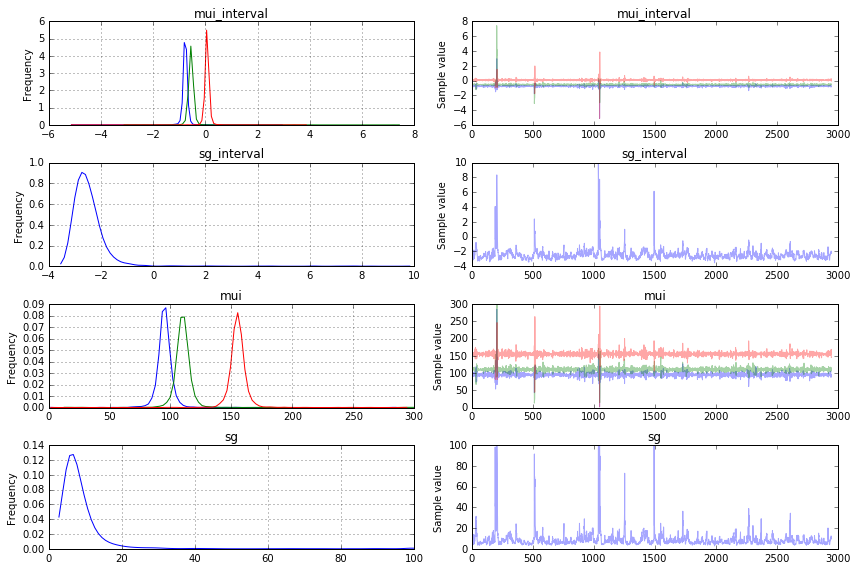

In [12]:
trace2=pm.sample(3e3, step, model=model)

pm.traceplot(trace2[50:]);

mu = trace2['mui'][50:]
sigma = trace2['sg'][50:]

print("The mu estimation is: ", np.mean(mu,axis = 0))
print("The sigma estimation is: ",sigma.mean())